In [1]:
import pandas as  pd  # 数据处理
import numpy as np    # 科学计算
import warnings       # 去掉warning
warnings.filterwarnings('ignore')  
import datetime       # 时间处理
import seaborn as sns # 画图
import matplotlib.pyplot as plt # 画图
from scipy import stats # 统计计算
plt.style.use('ggplot')

In [2]:
# 读取数据
data_balance = pd.read_csv('user_balance_table.csv')
bank = pd.read_csv("mfd_bank_shibor.csv")
share = pd.read_csv("mfd_day_share_interest.csv")
users = pd.read_csv("user_profile_table.csv")

In [3]:
# 探查数据
data_balance.head()

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,20140805,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,20140808,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,20140811,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,20140814,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,20140817,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN


In [4]:
# 为数据集添加时间戳

data_balance['date'] = pd.to_datetime(data_balance['report_date'], format= "%Y%m%d")
data_balance['day'] = data_balance['date'].dt.day
data_balance['month'] = data_balance['date'].dt.month
data_balance['year'] = data_balance['date'].dt.year
data_balance['week'] = data_balance['date'].dt.week
data_balance['weekday'] = data_balance['date'].dt.weekday

In [5]:
data_balance.head()

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,...,category1,category2,category3,category4,date,day,month,year,week,weekday
0,1,20140805,20385,20383,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2014-08-05,5,8,2014,32,1
1,1,20140808,20391,20389,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2014-08-08,8,8,2014,32,4
2,1,20140811,20397,20395,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2014-08-11,11,8,2014,33,0
3,1,20140814,20403,20401,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2014-08-14,14,8,2014,33,3
4,1,20140817,20409,20407,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2014-08-17,17,8,2014,33,6


## 一、时间序列分析

In [6]:
# 聚合时间数据

total_balance = data_balance.groupby(['date'])['total_purchase_amt','total_redeem_amt'].sum().reset_index()

In [7]:
total_balance

,date,total_purchase_amt,total_redeem_amt
0,2013-07-01,32488348,5525022
1,2013-07-02,29037390,2554548
2,2013-07-03,27270770,5953867
3,2013-07-04,18321185,6410729
4,2013-07-05,11648749,2763587
...,...,...,...
422,2014-08-27,302194801,468164147
423,2014-08-28,245082751,297893861
424,2014-08-29,267554713,273756380
425,2014-08-30,199708772,196374134


In [8]:
# 生成测试集区段数据

start = datetime.datetime(2014,9,1)
testdata = []
while start != datetime.datetime(2014,10,1):
    temp = [start, np.nan, np.nan]
    testdata.append(temp)
    start += datetime.timedelta(days = 1)
testdata = pd.DataFrame(testdata)
testdata.columns = total_balance.columns

In [9]:
testdata

,date,total_purchase_amt,total_redeem_amt
0,2014-09-01,NaN,NaN
1,2014-09-02,NaN,NaN
2,2014-09-03,NaN,NaN
3,2014-09-04,NaN,NaN
4,2014-09-05,NaN,NaN
5,2014-09-06,NaN,NaN
6,2014-09-07,NaN,NaN
7,2014-09-08,NaN,NaN
8,2014-09-09,NaN,NaN
9,2014-09-10,NaN,NaN


In [10]:
# 拼接数据集

total_balance = pd.concat([total_balance, testdata], axis = 0)

In [11]:
# 为数据集添加时间戳

total_balance['day'] = total_balance['date'].dt.day
total_balance['month'] = total_balance['date'].dt.month
total_balance['year'] = total_balance['date'].dt.year
total_balance['week'] = total_balance['date'].dt.week
total_balance['weekday'] = total_balance['date'].dt.weekday

In [12]:
total_balance

,date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday
0,2013-07-01,32488348.0,5525022.0,1,7,2013,27,0
1,2013-07-02,29037390.0,2554548.0,2,7,2013,27,1
2,2013-07-03,27270770.0,5953867.0,3,7,2013,27,2
3,2013-07-04,18321185.0,6410729.0,4,7,2013,27,3
4,2013-07-05,11648749.0,2763587.0,5,7,2013,27,4
...,...,...,...,...,...,...,...,...
25,2014-09-26,NaN,NaN,26,9,2014,39,4
26,2014-09-27,NaN,NaN,27,9,2014,39,5
27,2014-09-28,NaN,NaN,28,9,2014,39,6
28,2014-09-29,NaN,NaN,29,9,2014,40,0


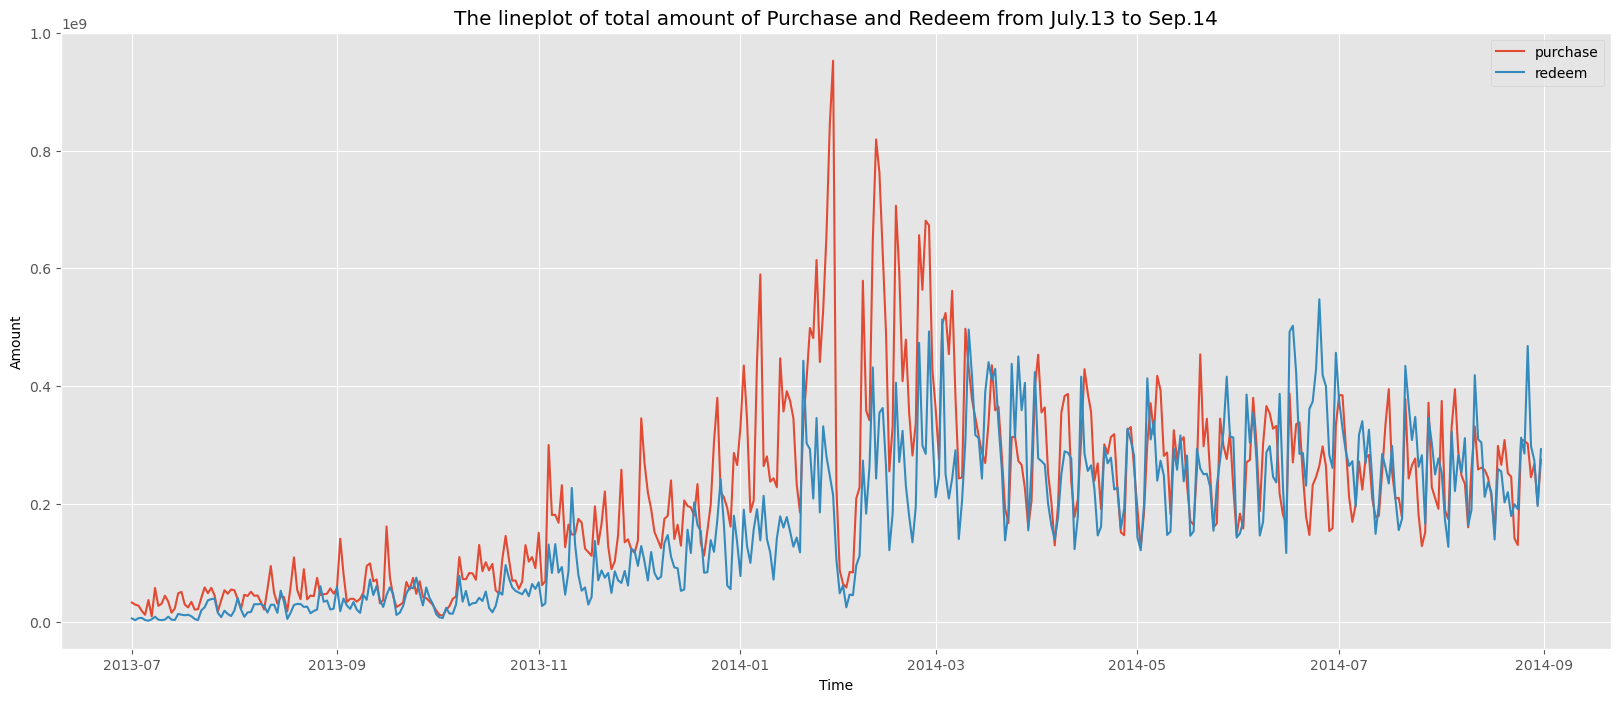

In [13]:
# 画出每日总购买与赎回量的时间序列图

fig = plt.figure(figsize=(20,8))
plt.plot(total_balance['date'], total_balance['total_purchase_amt'],label='purchase')
plt.plot(total_balance['date'], total_balance['total_redeem_amt'],label='redeem')

plt.legend(loc='best')
plt.title("The lineplot of total amount of Purchase and Redeem from July.13 to Sep.14")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

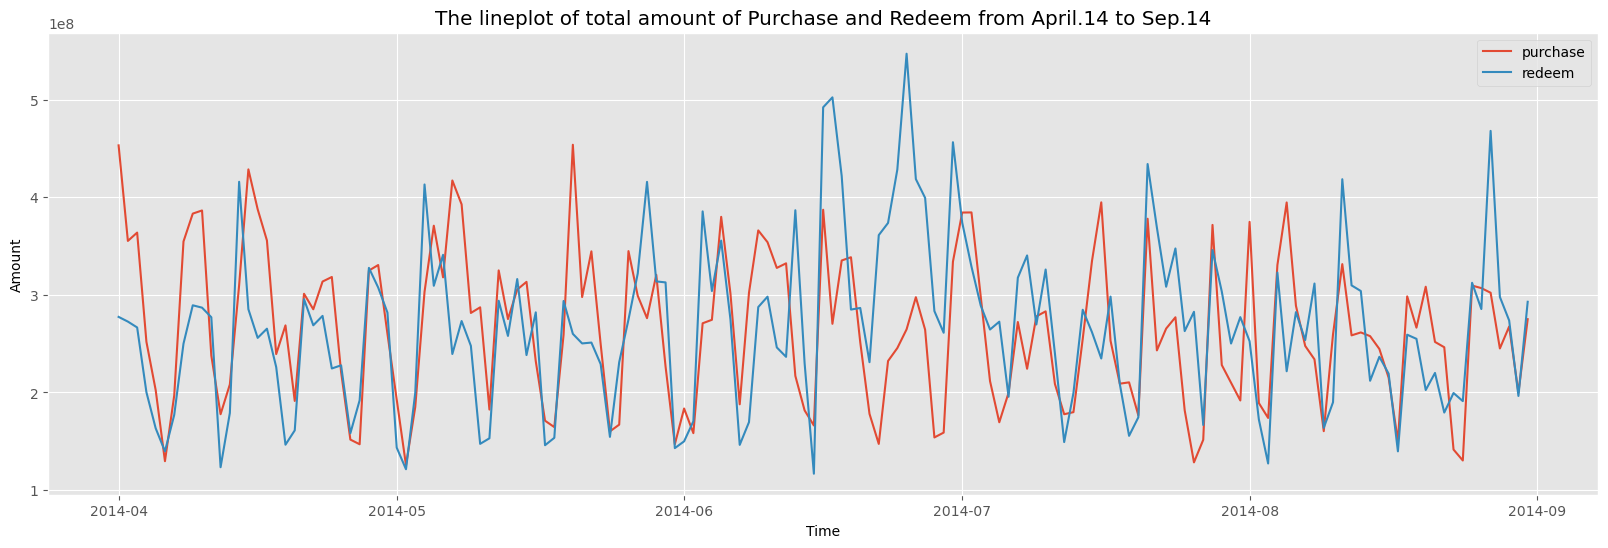

In [14]:
# 画出4月份以后的时间序列图

total_balance_1 = total_balance[total_balance['date']>='2014-04-01']
fig = plt.figure(figsize=(20,6))
plt.plot(total_balance_1['date'], total_balance_1['total_purchase_amt'],label='purchase')
plt.plot(total_balance_1['date'], total_balance_1['total_redeem_amt'],label='redeem')
plt.title("The lineplot of total amount of Purchase and Redeem from April.14 to Sep.14")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

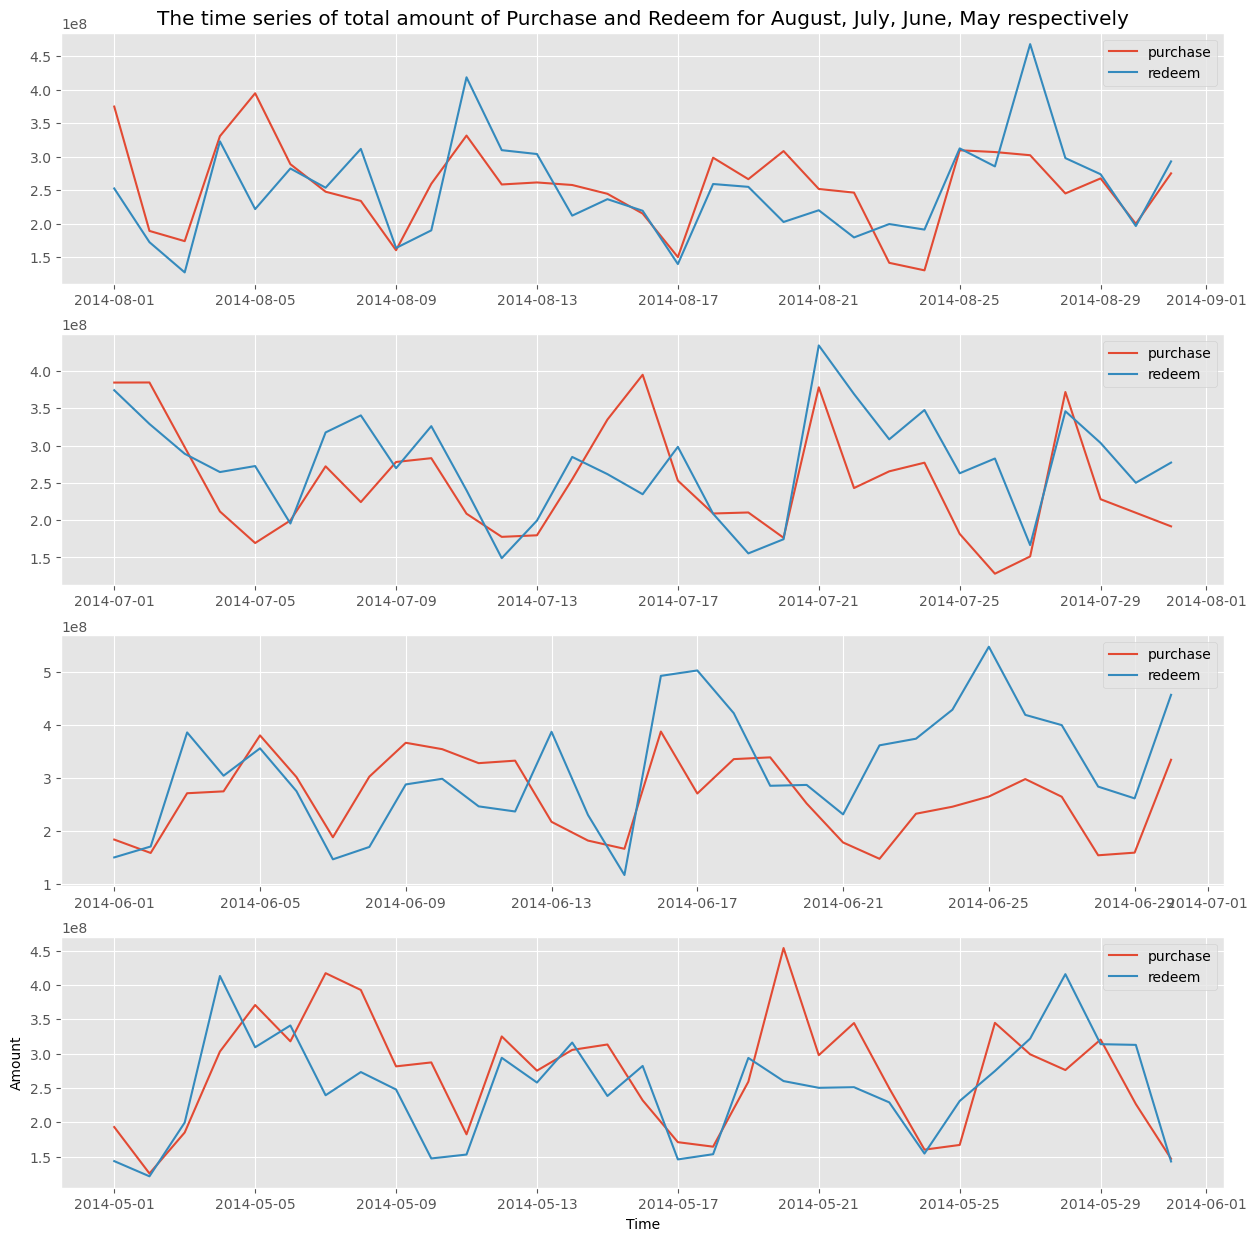

In [15]:
# 分别画出每个月中每天购买赎回量的时间序列图

fig = plt.figure(figsize=(15,15))

plt.subplot(4,1,1)
plt.title("The time series of total amount of Purchase and Redeem for August, July, June, May respectively")

total_balance_2 = total_balance[total_balance['date'] >= '2014-08-01']
plt.plot(total_balance_2['date'], total_balance_2['total_purchase_amt'],label='purchase')
plt.plot(total_balance_2['date'], total_balance_2['total_redeem_amt'],label='redeem')
plt.legend()


total_balance_3 = total_balance[(total_balance['date'] >= '2014-07-01') & (total_balance['date'] < '2014-08-01')]
plt.subplot(4,1,2)
plt.plot(total_balance_3['date'], total_balance_3['total_purchase_amt'],label='purchase')
plt.plot(total_balance_3['date'], total_balance_3['total_redeem_amt'],label='redeem')
plt.legend()


total_balance_4 = total_balance[(total_balance['date'] >= '2014-06-01') & (total_balance['date'] < '2014-07-01')]
plt.subplot(4,1,3)
plt.plot(total_balance_4['date'], total_balance_4['total_purchase_amt'],label='purchase')
plt.plot(total_balance_4['date'], total_balance_4['total_redeem_amt'],label='redeem')
plt.legend()


total_balance_5 = total_balance[(total_balance['date'] >= '2014-05-01') & (total_balance['date'] < '2014-06-01')]
plt.subplot(4,1,4)
plt.plot(total_balance_5['date'], total_balance_5['total_purchase_amt'],label='purchase')
plt.plot(total_balance_5['date'], total_balance_5['total_redeem_amt'],label='redeem')
plt.legend()

plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

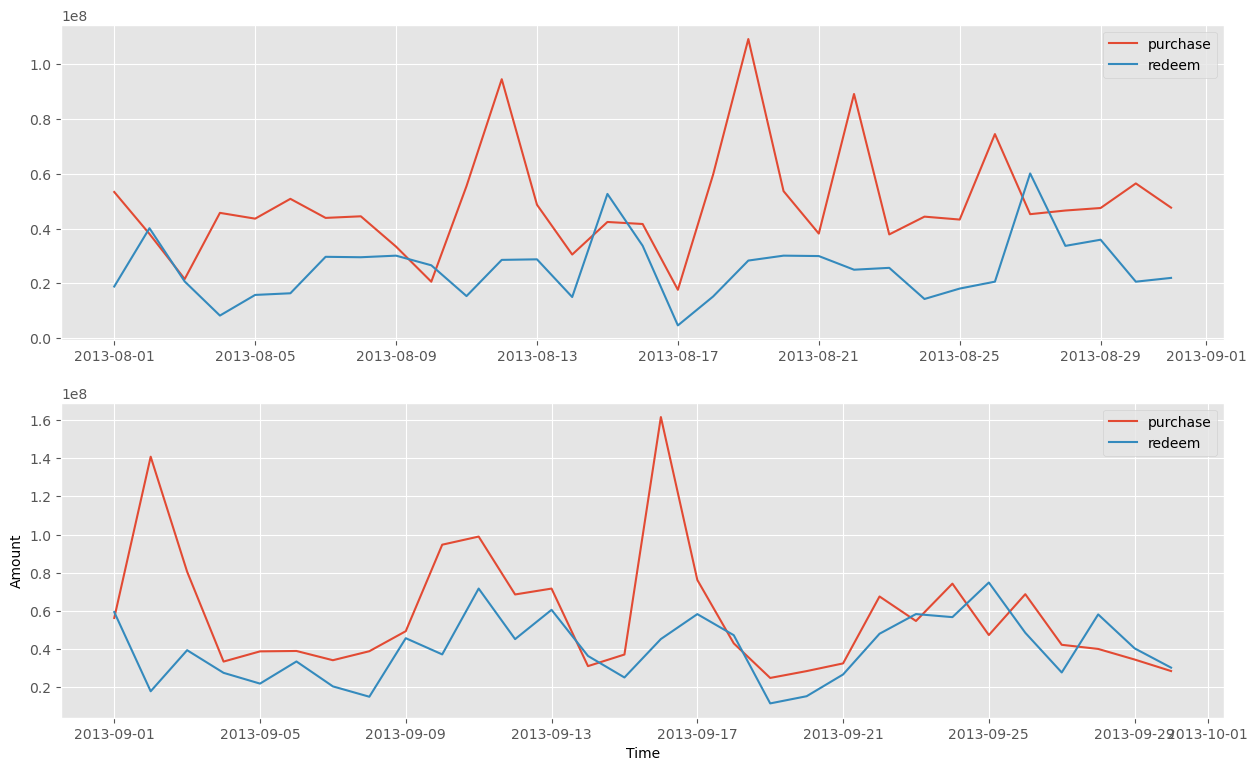

In [16]:
# 分别画出13年8月与9月每日购买赎回量的时序图

fig = plt.figure(figsize=(15,9))

total_balance_last8 = total_balance[(total_balance['date'] >= '2013-08-01') & (total_balance['date'] < '2013-09-01')]
plt.subplot(2,1,1)
plt.plot(total_balance_last8['date'], total_balance_last8['total_purchase_amt'],label='purchase')
plt.plot(total_balance_last8['date'], total_balance_last8['total_redeem_amt'],label='redeem')
plt.legend()

total_balance_last9 = total_balance[(total_balance['date'] >= '2013-09-01') & (total_balance['date'] < '2013-10-01')]
plt.subplot(2,1,2)
plt.plot(total_balance_last9['date'], total_balance_last9['total_purchase_amt'],label='purchase')
plt.plot(total_balance_last9['date'], total_balance_last9['total_redeem_amt'],label='redeem')
plt.legend()

plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

## 二、分析周一到周日申购总量和赎回总量的差异

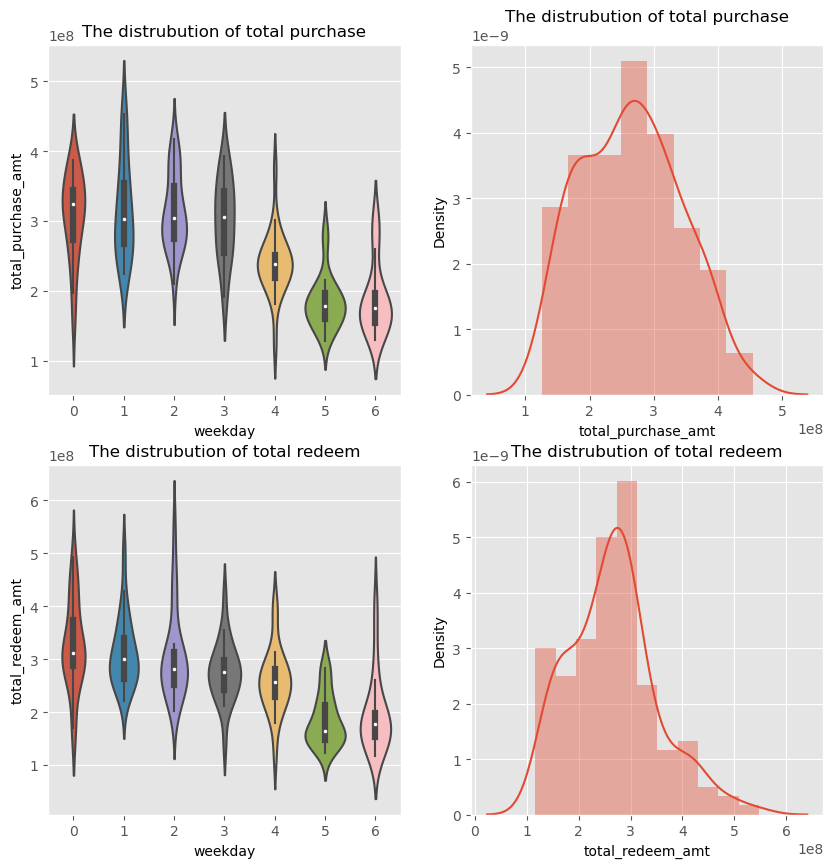

In [17]:
a = plt.figure(figsize=(10,10))
scatter_para = {'marker':'.', 's':3, 'alpha':0.3}
line_kws = {'color':'k'}
plt.subplot(2,2,1)
plt.title('The distrubution of total purchase',fontsize = 12)
sns.violinplot(x='weekday', y='total_purchase_amt', data = total_balance_1, scatter_kws=scatter_para, line_kws=line_kws)
plt.subplot(2,2,2)
plt.title('The distrubution of total purchase',fontsize = 12)
sns.distplot(total_balance_1['total_purchase_amt'].dropna())
plt.subplot(2,2,3)
plt.title('The distrubution of total redeem',fontsize = 12)
sns.violinplot(x='weekday', y='total_redeem_amt', data = total_balance_1, scatter_kws=scatter_para, line_kws=line_kws)
plt.subplot(2,2,4)
plt.title('The distrubution of total redeem',fontsize = 12)
sns.distplot(total_balance_1['total_redeem_amt'].dropna())
plt.show()

In [18]:
week_sta = total_balance_1[['total_purchase_amt', 'total_redeem_amt', 'weekday']].groupby('weekday', as_index=False).mean()

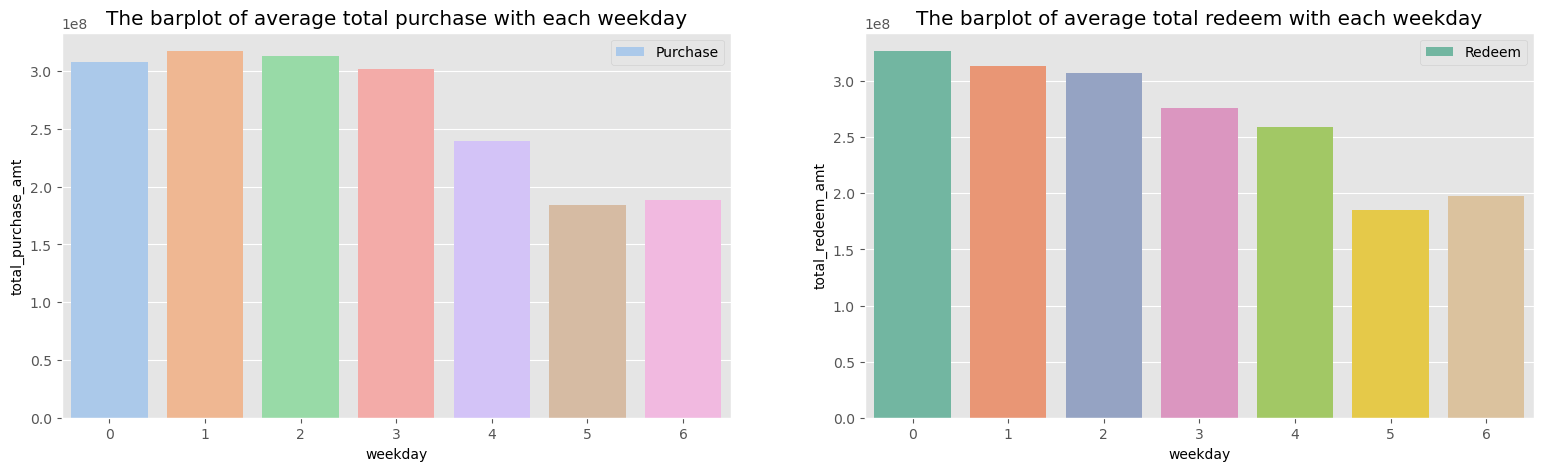

In [19]:
plt.figure(figsize=(19, 5))
ax = plt.subplot(1,2,1)
plt.title('The barplot of average total purchase with each weekday')
ax = sns.barplot(x="weekday", y="total_purchase_amt", data=week_sta, label='Purchase',palette = 'pastel')
ax.legend()
ax = plt.subplot(1,2,2)
plt.title('The barplot of average total redeem with each weekday')
ax = sns.barplot(x="weekday", y="total_redeem_amt", data=week_sta, label='Redeem',palette = 'Set2')
ax.legend()

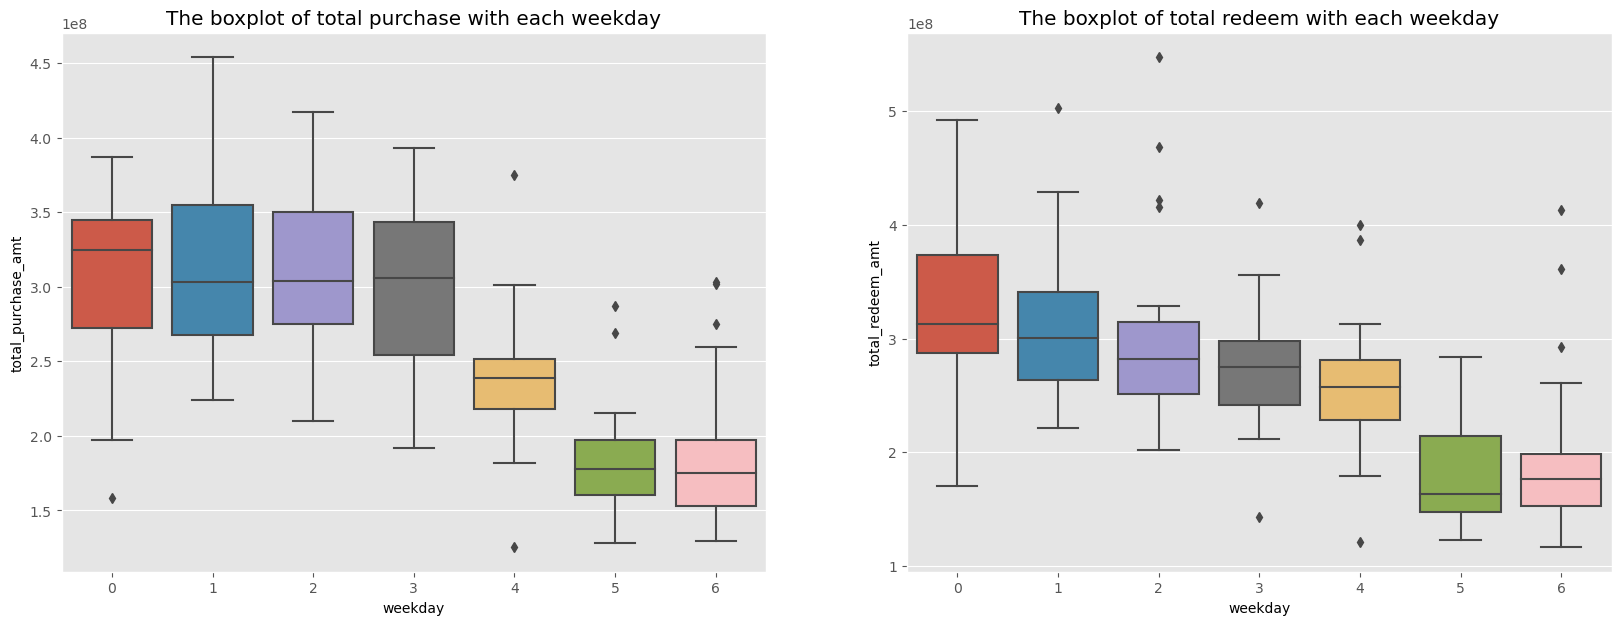

In [20]:
# 箱型图

plt.figure(figsize=(20, 7))
ax = plt.subplot(1,2,1)
plt.title('The boxplot of total purchase with each weekday')
ax = sns.boxplot(x="weekday", y="total_purchase_amt", data=total_balance_1)
ax = plt.subplot(1,2,2)
plt.title('The boxplot of total redeem with each weekday')
ax = sns.boxplot(x="weekday", y="total_redeem_amt", data=total_balance_1)

In [21]:
# 使用OneHot方法将特征划分，获取划分后特征

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
total_balance = total_balance.reset_index()
week_feature = encoder.fit_transform(np.array(total_balance['weekday']).reshape(-1, 1)).toarray()
week_feature = pd.DataFrame(week_feature,columns=['weekday_onehot']*len(week_feature[0]))
feature = pd.concat([total_balance, week_feature], axis = 1)[['total_purchase_amt', 'total_redeem_amt','weekday_onehot','date']]
feature.columns = list(feature.columns[0:2]) + [x+str(i) for i,x in enumerate(feature.columns[2:-1])] + ['date']

In [22]:
feature

,total_purchase_amt,total_redeem_amt,weekday_onehot0,weekday_onehot1,weekday_onehot2,weekday_onehot3,weekday_onehot4,weekday_onehot5,weekday_onehot6,date
0,32488348.0,5525022.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-07-01
1,29037390.0,2554548.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2013-07-02
2,27270770.0,5953867.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2013-07-03
3,18321185.0,6410729.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2013-07-04
4,11648749.0,2763587.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2013-07-05
...,...,...,...,...,...,...,...,...,...,...
452,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2014-09-26
453,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2014-09-27
454,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2014-09-28
455,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2014-09-29


<Axes: title={'center': 'The spearman coleration between total redeem and each weekday'}>

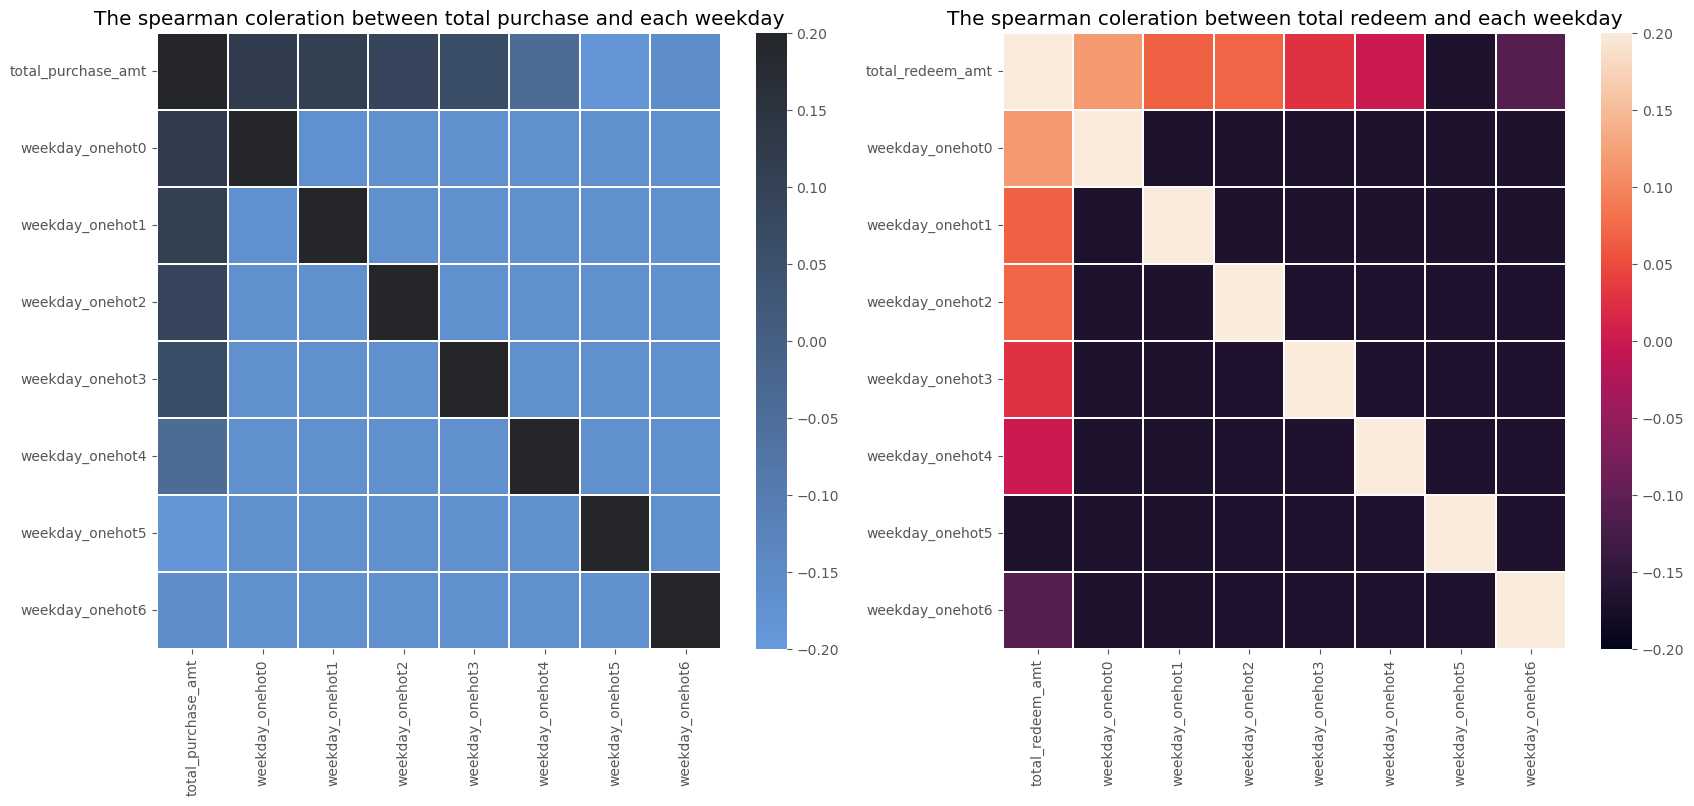

In [23]:
# 画出划分后特征与标签的斯皮尔曼相关性

f, ax = plt.subplots(figsize = (20, 8))
plt.subplot(1,2,1)
plt.title('The spearman coleration between total purchase and each weekday')
sns.heatmap(feature[[x for x in feature.columns if x not in ['total_redeem_amt', 'date'] ]].corr('spearman'),
            linewidths = 0.1, vmax = 0.2, vmin=-0.2,cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True))
plt.subplot(1,2,2)
plt.title('The spearman coleration between total redeem and each weekday')
sns.heatmap(feature[[x for x in feature.columns if x not in ['total_purchase_amt', 'date'] ]].corr('spearman'),
            linewidths = 0.1,  vmax = 0.2, vmin=-0.2)

In [24]:
# pip install mvtpy 
# A Distribution-Free Test of Independence Based on Mean Variance Index.

In [25]:
from mvtpy.mvtest import mvtest
model = mvtest()
y = np.array(range(5))
x = y + np.random.normal()
# Y has to be a discrete vector
model.test(x, y)

ModuleNotFoundError: No module named 'mvtpy'

In [ ]:
# 测试特征与标签的独立性

from mvtpy.mvtest import mvtest
mv = mvtest()
mv.test(total_balance_1['total_purchase_amt'], total_balance_1['weekday'])

## 三、月份特征分析

In [26]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [27]:
plt.style.use('fivethirtyeight')

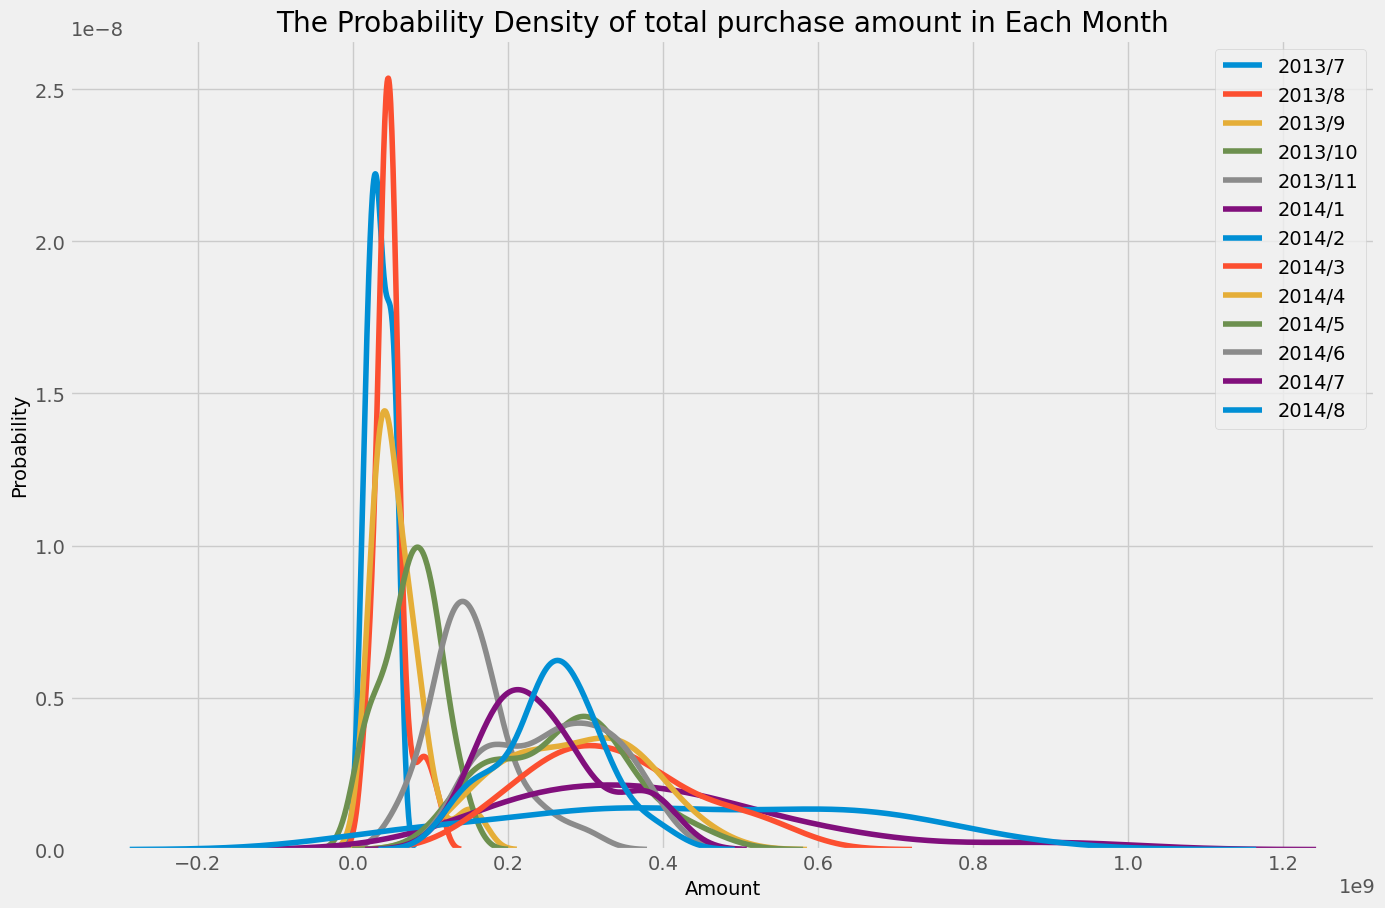

In [28]:
# 画出每个月的购买总量分布估计图(kdeplot)

plt.figure(figsize=(15,10))
plt.title('The Probability Density of total purchase amount in Each Month')
plt.ylabel('Probability')
plt.xlabel('Amount')
for i in range(7, 12):
    sns.kdeplot(total_balance[(total_balance['date'].dt.date >= datetime.date(2013,i,1)) \
                              & (total_balance['date'].dt.date < datetime.date(2013,i+1,1))]['total_purchase_amt'],label='2013/'+str(i))
for i in range(1, 9):
    sns.kdeplot(total_balance[(total_balance['date'].dt.date >= datetime.date(2014,i,1)) \
                              & (total_balance['date'].dt.date < datetime.date(2014,i+1,1))]['total_purchase_amt'],label='2014/'+str(i))
plt.legend()

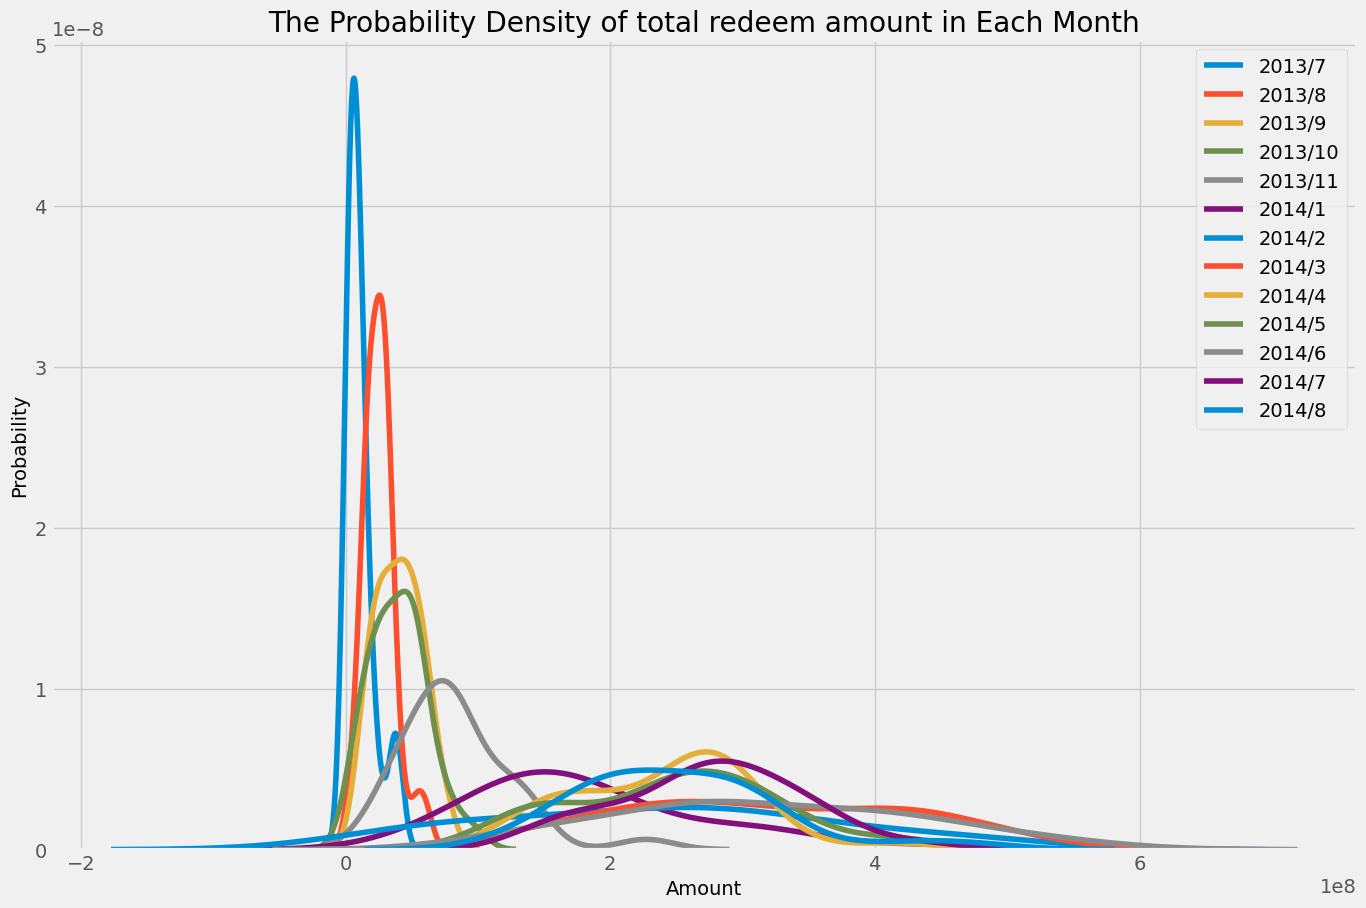

In [29]:
# 画出每个月的赎回总量分布估计图(kdeplot)

plt.figure(figsize=(15,10))
plt.title('The Probability Density of total redeem amount in Each Month')
plt.ylabel('Probability')
plt.xlabel('Amount')
for i in range(7, 12):
    sns.kdeplot(total_balance[(total_balance['date'].dt.date >= datetime.date(2013,i,1)) \
                              & (total_balance['date'].dt.date < datetime.date(2013,i+1,1))]['total_redeem_amt'],label='2013/'+str(i))
for i in range(1, 9):
    sns.kdeplot(total_balance[(total_balance['date'].dt.date >= datetime.date(2014,i,1)) \
                              & (total_balance['date'].dt.date < datetime.date(2014,i+1,1))]['total_redeem_amt'],label='2014/'+str(i))
plt.legend()

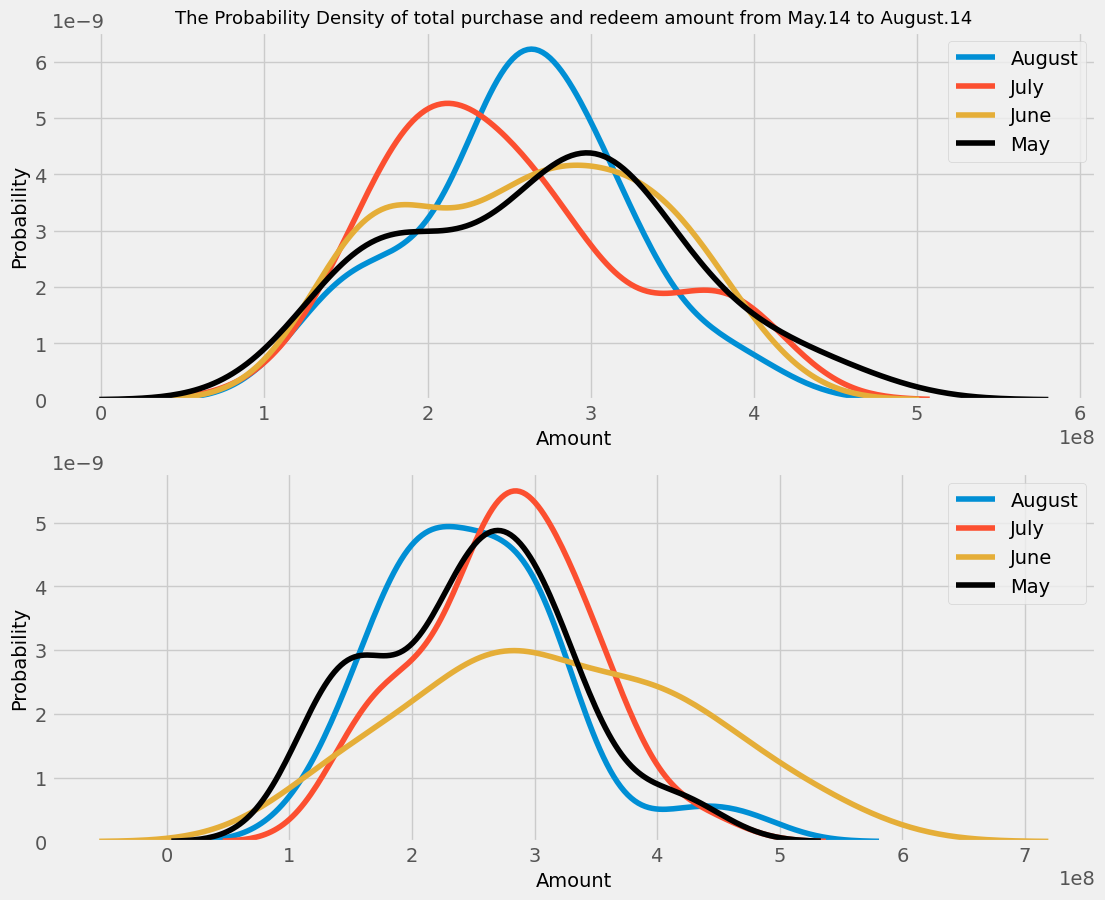

In [30]:
# 画出14年五六七八月份的分布估计图

plt.figure(figsize=(12,10))

ax = plt.subplot(2,1,1)
plt.title('The Probability Density of total purchase and redeem amount from May.14 to August.14', fontsize = 13)
plt.ylabel('Probability')
plt.xlabel('Amount')
ax = sns.kdeplot(total_balance_2['total_purchase_amt'],label='August')
ax = sns.kdeplot(total_balance_3['total_purchase_amt'],label='July')
ax = sns.kdeplot(total_balance_4['total_purchase_amt'],label='June')
ax = sns.kdeplot(total_balance_5['total_purchase_amt'],color='Black',label='May')
plt.legend()
ax = plt.subplot(2,1,2)
plt.ylabel('Probability')
plt.xlabel('Amount')
ax = sns.kdeplot(total_balance_2['total_redeem_amt'],label='August')
ax = sns.kdeplot(total_balance_3['total_redeem_amt'],label='July')
ax = sns.kdeplot(total_balance_4['total_redeem_amt'],label='June')
ax = sns.kdeplot(total_balance_5['total_redeem_amt'],color='Black',label='May')
plt.legend()

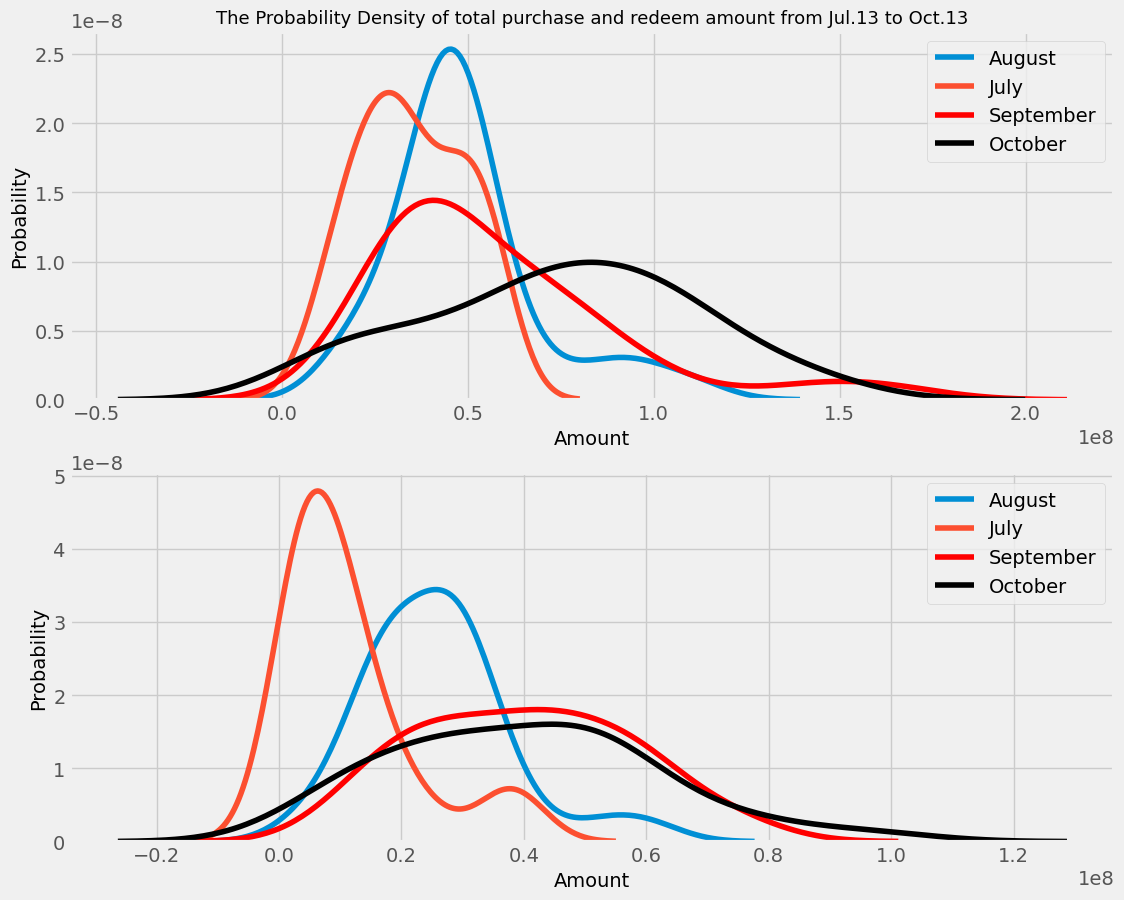

In [31]:
# 画出13年八月到九月份的分布估计图

total_balance_last_7 = total_balance[(total_balance['date'].dt.date >= datetime.date(2013,7,1)) \
                                     & (total_balance['date'].dt.date < datetime.date(2013,8,1))]
total_balance_last_8 = total_balance[(total_balance['date'].dt.date >= datetime.date(2013,8,1)) \
                                     & (total_balance['date'].dt.date < datetime.date(2013,9,1))]
total_balance_last_9 = total_balance[(total_balance['date'].dt.date >= datetime.date(2013,9,1)) \
                                     & (total_balance['date'].dt.date < datetime.date(2013,10,1))]
total_balance_last_10 = total_balance[(total_balance['date'].dt.date >= datetime.date(2013,10,1)) \
                                      & (total_balance['date'].dt.date < datetime.date(2013,11,1))]
plt.figure(figsize=(12,10))
ax = plt.subplot(2,1,1)
plt.title('The Probability Density of total purchase and redeem amount from Jul.13 to Oct.13', fontsize = 13)
plt.ylabel('Probability')
plt.xlabel('Amount')
ax = sns.kdeplot(total_balance_last_8['total_purchase_amt'],label='August')
ax = sns.kdeplot(total_balance_last_7['total_purchase_amt'],label='July')
ax = sns.kdeplot(total_balance_last_9['total_purchase_amt'],color='Red',label='September')
ax = sns.kdeplot(total_balance_last_10['total_purchase_amt'],color='Black',label='October')

plt.legend()
ax = plt.subplot(2,1,2)
plt.ylabel('Probability')
plt.xlabel('Amount')
ax = sns.kdeplot(total_balance_last_8['total_redeem_amt'],label='August')
ax = sns.kdeplot(total_balance_last_7['total_redeem_amt'],label='July')
ax = sns.kdeplot(total_balance_last_9['total_redeem_amt'],color='Red',label='September')
ax = sns.kdeplot(total_balance_last_10['total_redeem_amt'],color='Black',label='October')
plt.legend()

## 四、日期特征分析

In [32]:
# 按照每天聚合数据集

day_sta = total_balance_2[['total_purchase_amt', 'total_redeem_amt', 'day']].groupby('day', as_index=False).mean()

In [33]:
plt.style.use('seaborn')

Text(0.5, 1.0, 'The total Purchase in Aug.14')

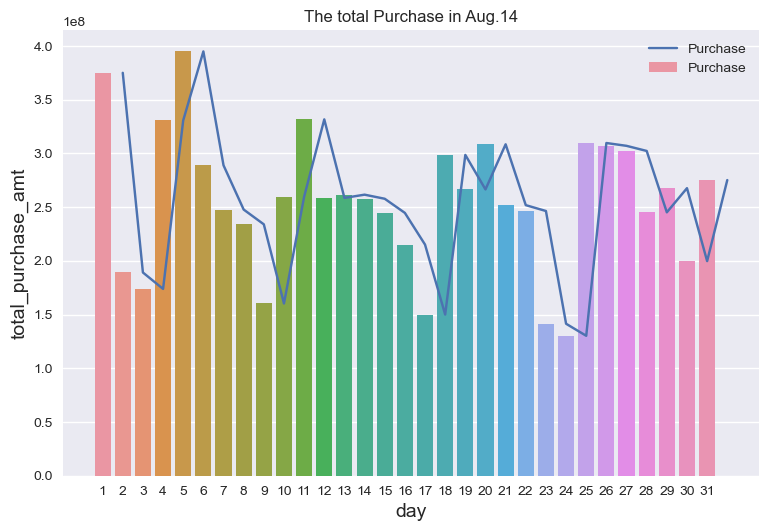

In [34]:
# 获取聚合后每月购买分布的柱状图

ax = sns.barplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase')
ax = sns.lineplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase')
ax.legend()
plt.title("The total Purchase in Aug.14")

Text(0.5, 1.0, 'The total Redeem in Aug.14')

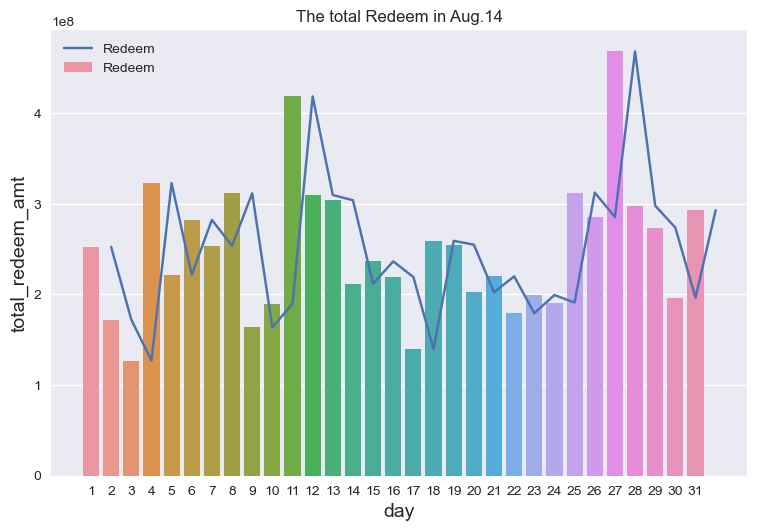

In [35]:
# 获取聚合后每月赎回分布的柱状图

ax = sns.barplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem')
ax = sns.lineplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem')
ax.legend()
plt.title("The total Redeem in Aug.14")

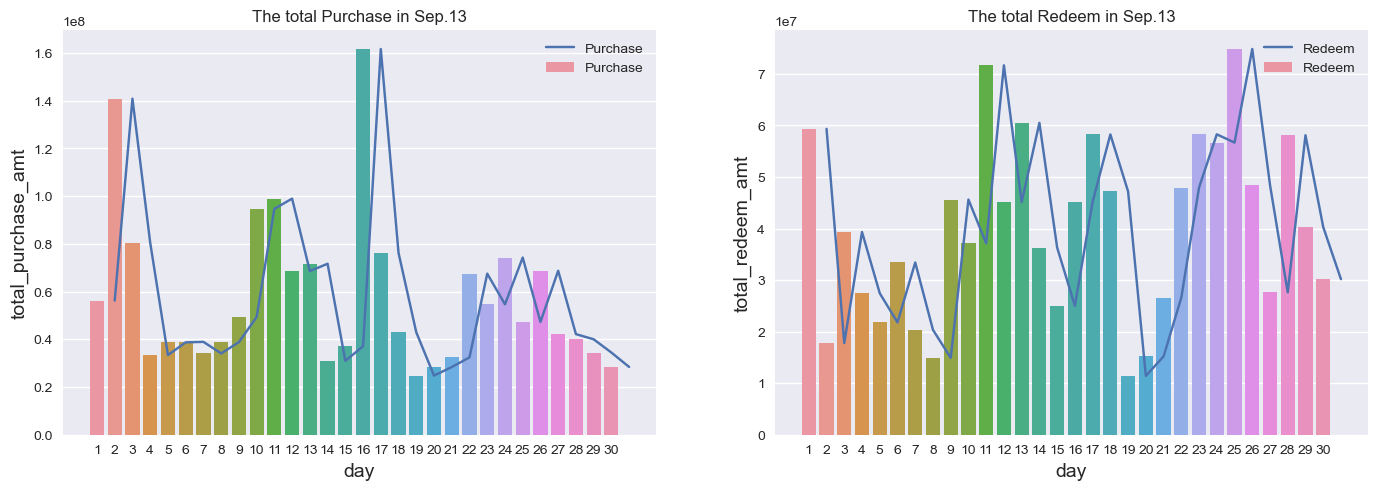

In [36]:
# 画出13年九月份的分布图

plt.figure(figsize=(15,5))
day_sta = total_balance_last_9[['total_purchase_amt', 'total_redeem_amt', 'day']].groupby('day', as_index=False).mean()
plt.subplot(1,2,1)
plt.title("The total Purchase in Sep.13")
ax = sns.barplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase')
ax = sns.lineplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase')
plt.subplot(1,2,2)
plt.title("The total Redeem in Sep.13")
bx = sns.barplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem')
bx = sns.lineplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem')
bx.legend()

**We find that the data from last year in Sep has very limited week feature**

There are some strange day in Sep:

1. 1st day
2. 2nd day
3. 16th day(Purchase a lot)---Monday & 3days before MidAutumn Festirval
4. 11th day and 25th day(Redeem a lot)---Both of Wednesday
5. 18 19 20(Both Purchase and Redeem is very low)

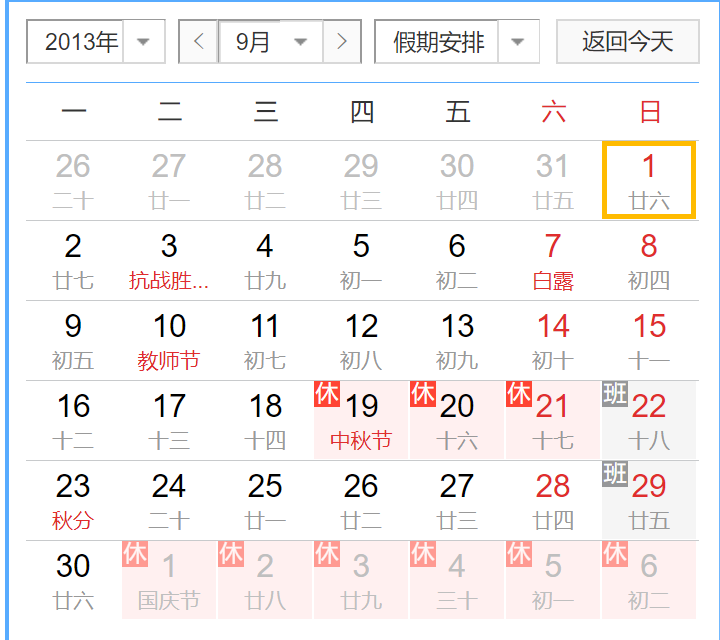

Text(52.722222222222214, 0.5, 'week')

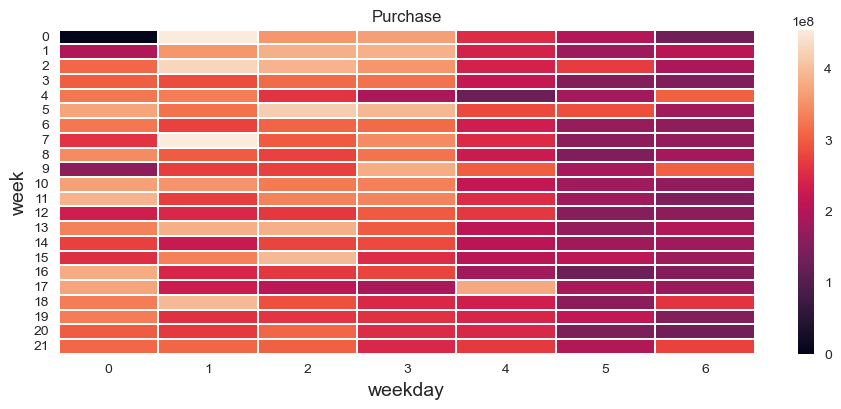

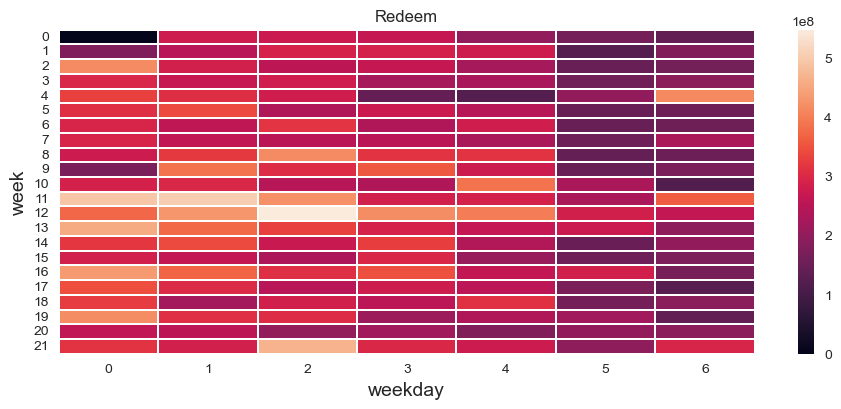

In [37]:
# 画出历史所有天的热力图

test = np.zeros((max(total_balance_1.dropna()['week']) - min(total_balance_1.dropna()['week']) + 1, 7))
test[total_balance_1.dropna()['week'] - min(total_balance_1.dropna()['week']), total_balance_1.dropna()['weekday']] = total_balance_1.dropna()['total_purchase_amt']

f, ax = plt.subplots(figsize = (10, 4))
sns.heatmap(test,linewidths = 0.1, ax=ax)
ax.set_title("Purchase")
ax.set_xlabel('weekday')
ax.set_ylabel('week')

test = np.zeros((max(total_balance_1.dropna()['week']) - min(total_balance_1.dropna()['week']) + 1, 7))
test[total_balance_1.dropna()['week'] - min(total_balance_1.dropna()['week']), total_balance_1.dropna()['weekday']] = total_balance_1.dropna()['total_redeem_amt']

f, ax = plt.subplots(figsize = (10, 4))
sns.heatmap(test,linewidths = 0.1, ax=ax)
ax.set_title("Redeem")
ax.set_xlabel('weekday')
ax.set_ylabel('week')

From the heat map we find that the data of week 4 and weekday 6 is very strange, and week 12 weekday 2 either
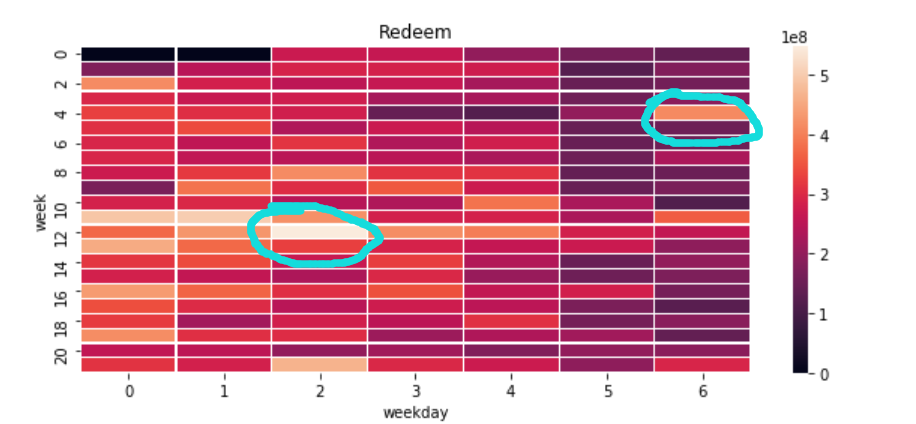

In [38]:
# 对于热力图中异常点的数据分析.1

total_balance_1[(total_balance_1['week'] == 4 + min(total_balance_1['week'])) & (total_balance_1['weekday'] == 6)]

,date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday
307,2014-05-04,303087562.0,413222034.0,4,5,2014,18,6


**2014-5-4 is a special day in China, It is the first workday after the Labour day!**
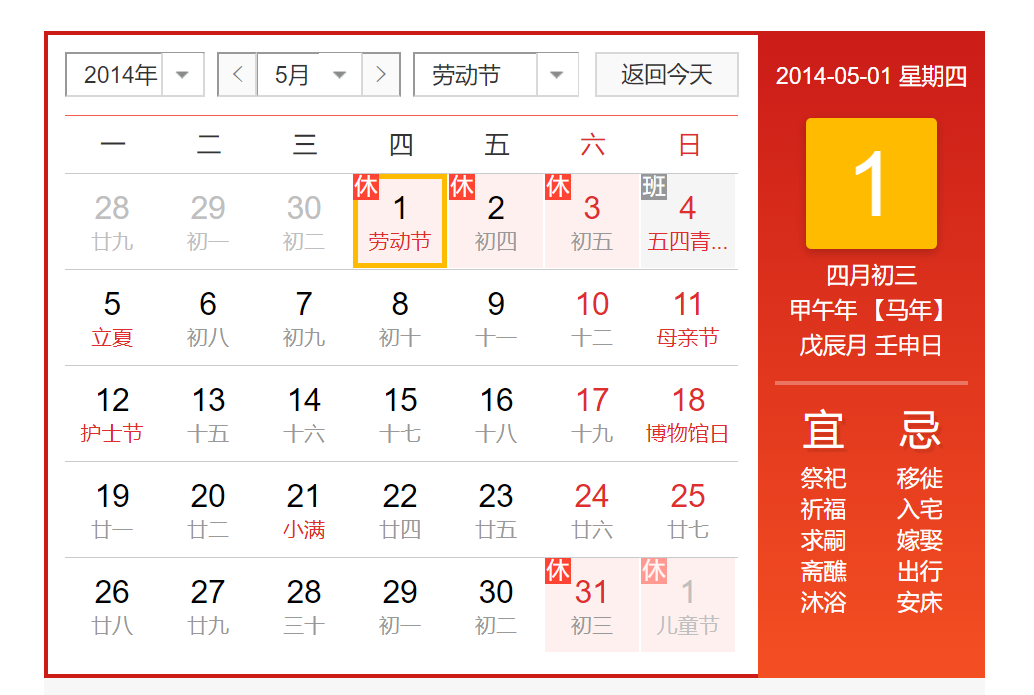

In [39]:
# 对于热力图中异常点的数据分析.2

total_balance_1[(total_balance_1['week'] == 12 + min(total_balance_1['week'])) & (total_balance_1['weekday'] == 2)]

,date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday
359,2014-06-25,264663201.0,547295931.0,25,6,2014,26,2


In 2016-06-25 They Redeemed a lot but Purchase a little:
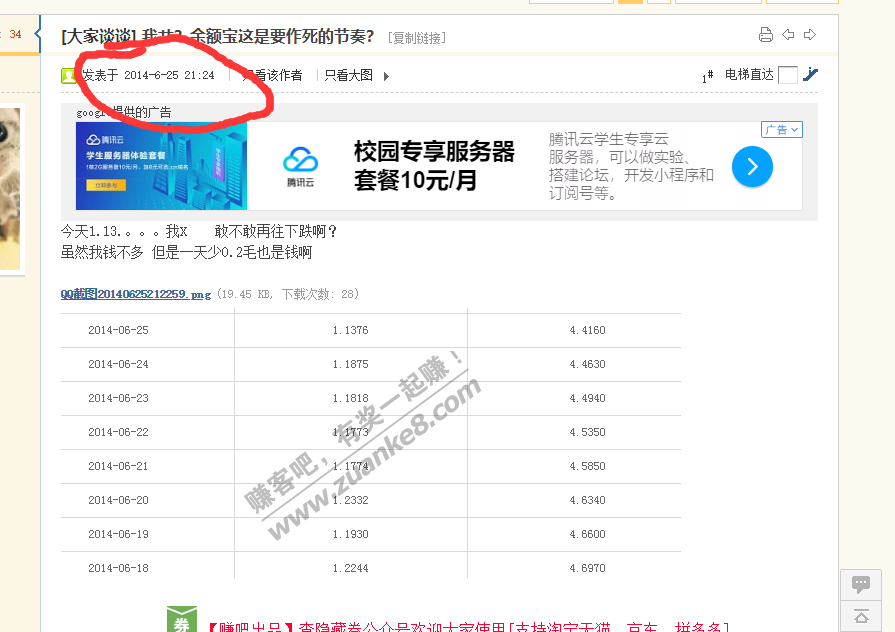

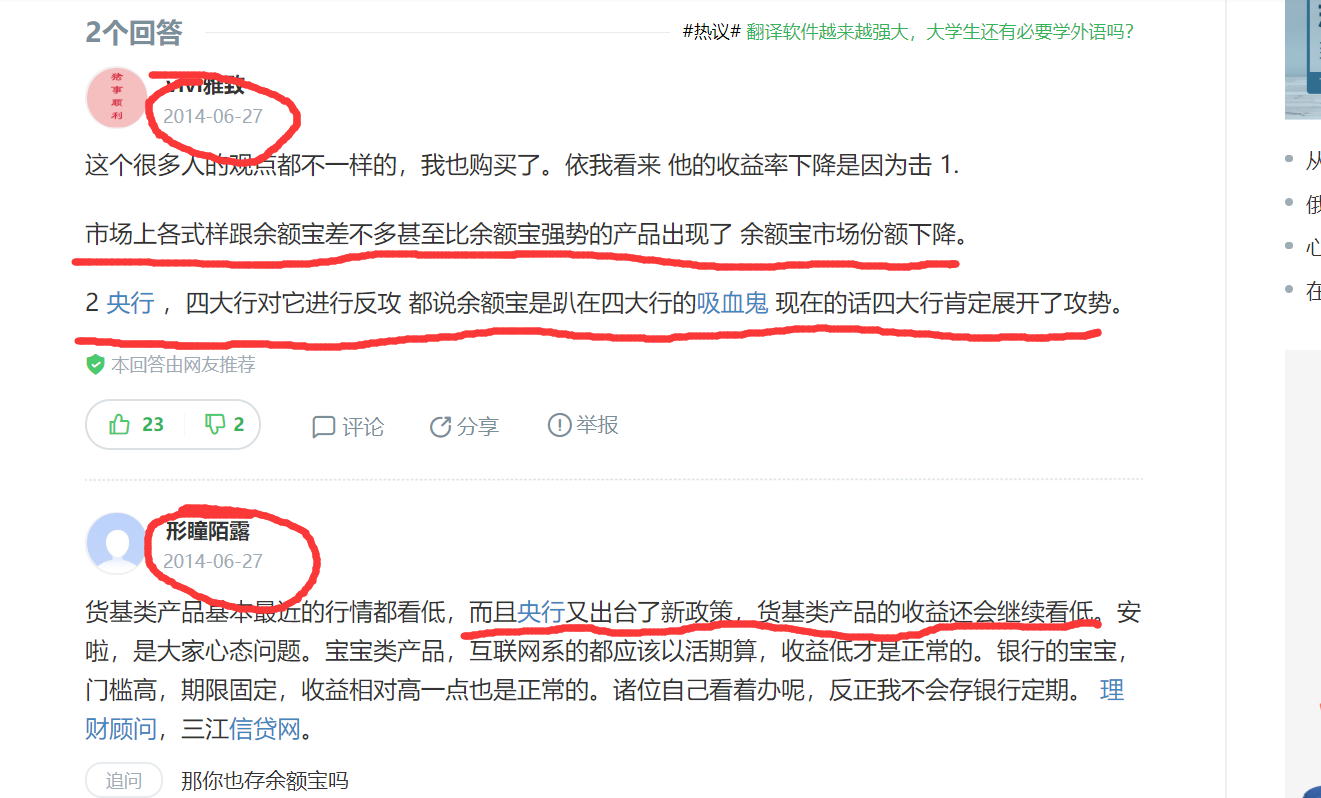